In [152]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random
import math


#**Создание и визуализация простыx графов**

##Задание 1

In [149]:
def generate_ring_graph(n):
    """
    Генерирует кольцевой граф из n узлов.

    :param n: Количество узлов в графе
    :return: Кольцевой граф в виде словаря смежности
    """
    if n < 3:
        raise ValueError("Количество узлов должно быть не менее 3")

    # Инициализация графа как словаря смежности
    graph = {i: [] for i in range(n)}

    # Добавление ребер для создания кольцевого графа
    for i in range(n):
        # Связываем текущий узел с предыдущим и следующим
        prev_node = (i - 1) % n
        next_node = (i + 1) % n
        graph[i].append(prev_node)
        graph[i].append(next_node)

    return graph

# Пример использования
n = 5
ring_graph = generate_ring_graph(n)
print("Кольцевой граф (словарь смежности):", ring_graph)

Кольцевой граф (словарь смежности): {0: [4, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 0]}


Кольцевой граф (словарь смежности): {0: [6, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 0]}


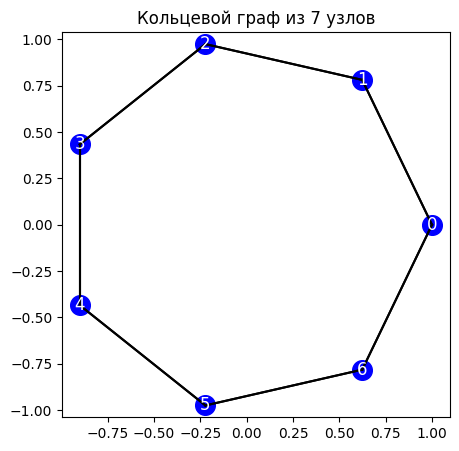

In [151]:
def visualize_graph(graph):
    """
    Визуализирует граф, представленный в виде словаря смежности.

    :param graph: Граф в виде словаря смежности
    """
    n = len(graph)
    pos = {}  # Позиции узлов
    for i in range(n):
        angle = 2 * math.pi * i / n  # Угол для каждого узла
        x = math.cos(angle)  # X-координата
        y = math.sin(angle)  # Y-координата
        pos[i] = (x, y)

    # Отрисовка узлов
    plt.figure(figsize=(5, 5))
    for node, (x, y) in pos.items():
        plt.scatter(x, y, color='blue', s=200)
        plt.text(x, y, str(node), fontsize=12, ha='center', va='center', color='white')

    # Отрисовка ребер
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            x1, y1 = pos[node]
            x2, y2 = pos[neighbor]
            plt.plot([x1, x2], [y1, y2], color='black')

    plt.title(f"Кольцевой граф из {n} узлов")
    plt.axis('equal')
    plt.show()

# Пример использования
n = 7
ring_graph = generate_ring_graph(n)
print("Кольцевой граф (словарь смежности):", ring_graph)
visualize_graph(ring_graph)

##Задание 2


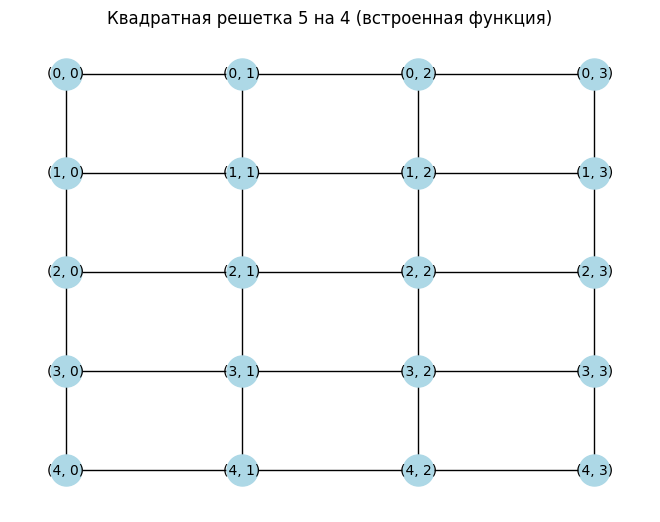

In [129]:
#2.1
# Создание квадратной решетки 5 на 4
G = nx.grid_2d_graph(5, 4)

# Визуализация графа
pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Изменяем позиции для правильной визуализации
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Квадратная решетка 5 на 4 (встроенная функция)")
plt.show()


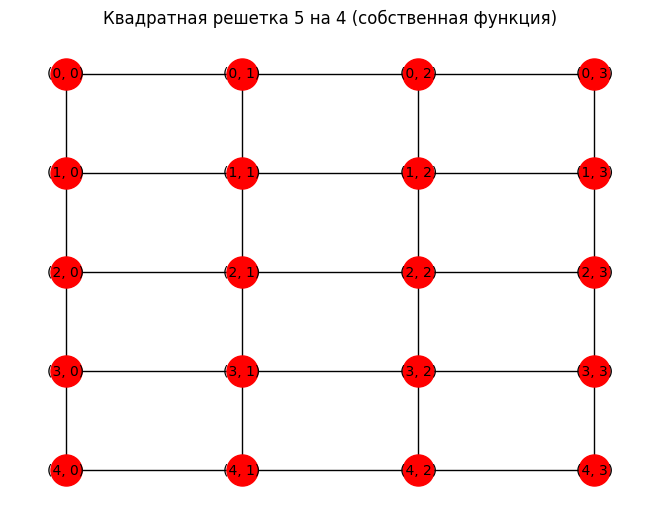

In [136]:
#2.2
def create_grid_graph(n, m):
    """
    Создает квадратную решетку n на m.

    :param n: Количество строк
    :param m: Количество столбцов
    :return: Квадратная решетка
    """
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))
            if i > 0:
                G.add_edge((i, j), (i - 1, j))  # Связываем с верхним узлом
            if j > 0:
                G.add_edge((i, j), (i, j - 1))  # Связываем с левым узлом

    return G

# Создание решетки 5 на 4
custom_grid = create_grid_graph(5, 4)

# Визуализация графа
pos = {(x, y): (y, -x) for x, y in custom_grid.nodes()}
nx.draw(custom_grid, pos, with_labels=True, node_color='red', node_size=500, font_size=10)
plt.title("Квадратная решетка 5 на 4 (собственная функция)")
plt.show()


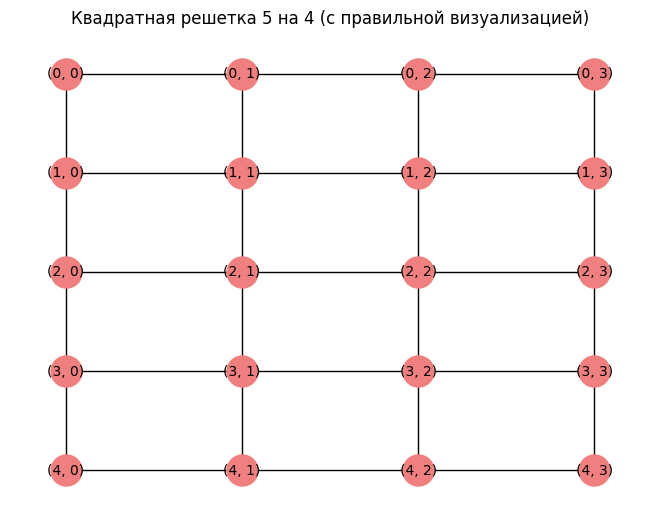

In [124]:
#2.3
def create_grid_graph_with_positions(n, m):
    """
    Создает квадратную решетку n на m с сохранением позиций для визуализации.

    :param n: Количество строк
    :param m: Количество столбцов
    :return: Квадратная решетка и позиции узлов
    """
    G = nx.Graph()
    pos = {}

    for i in range(n):
        for j in range(m):
            G.add_node((i, j))
            pos[(i, j)] = (j, -i)  # Сохраняем позиции для визуализации
            if i > 0:
                G.add_edge((i, j), (i - 1, j))
            if j > 0:
                G.add_edge((i, j), (i, j - 1))

    return G, pos

# Создание решетки 5 на 4
grid_with_pos, positions = create_grid_graph_with_positions(5, 4)

# Визуализация графа
nx.draw(grid_with_pos, positions, with_labels=True, node_color='lightcoral', node_size=500, font_size=10)
plt.title("Квадратная решетка 5 на 4 (с правильной визуализацией)")
plt.show()


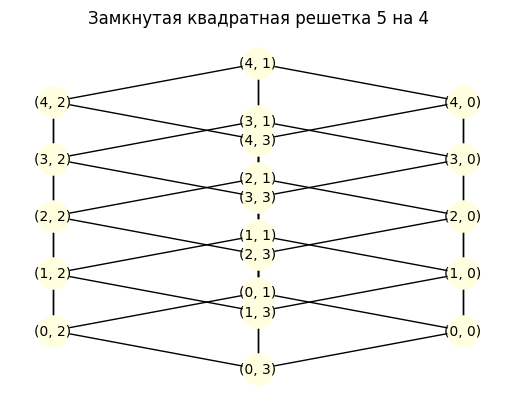

In [142]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random

def create_closed_grid_graph(n, m, close_rows=False, close_cols=False, position=False):
    """
    Создает квадратную решетку n на m с возможностью замыкания по строкам и столбцам.

    :param n: Количество строк
    :param m: Количество столбцов
    :param close_rows: Замыкание по строкам
    :param close_cols: Замыкание по столбцам
    :param position: Возвращать позиции узлов для визуализации
    :return: Квадратная решетка и позиции узлов (если position=True)
    """
    G = nx.Graph()

    # Добавление узлов и ребер
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))
            if i > 0:
                G.add_edge((i, j), (i - 1, j))  # Связь с верхним узлом
            if j > 0:
                G.add_edge((i, j), (i, j - 1))  # Связь с левым узлом

    # Замыкание по строкам
    if close_rows:
        for j in range(m):
            G.add_edge((0, j), (n - 1, j))  # Связь первой и последней строки

    # Замыкание по столбцам
    if close_cols:
        for i in range(n):
            G.add_edge((i, 0), (i, m - 1))  # Связь первого и последнего столбца

    # Позиции узлов для визуализации
    if position:
        pos = {}
        if close_rows or close_cols:
            # Циклические координаты для замыкания
            radius = 1  # Радиус окружности
            layer_offset = 1.5  # Смещение между слоями (строками)
            for i in range(n):
                for j in range(m):
                    angle = 2 * math.pi * j / m  # Угол для каждого узла в строке
                    x = radius * math.cos(angle)  # X-координата
                    y = radius * math.sin(angle) + i * layer_offset  # Y-координата со смещением
                    pos[(i, j)] = (x, y)
        else:
            # Линейные координаты для незамкнутой решетки
            pos = {(x, y): (y, -x) for x, y in G.nodes()}
    else:
        pos = None

    return G, pos

# Создание замкнутой решетки 5 на 4
closed_grid, closed_positions = create_closed_grid_graph(5, 4, close_rows=True, close_cols=True, position=True)

# Визуализация графа
fig, ax = plt.subplots()
nx.draw(closed_grid, closed_positions, with_labels=True, node_color='lightyellow', node_size=500, font_size=10)
plt.title("Замкнутая квадратная решетка 5 на 4")
plt.grid(True)
plt.show()



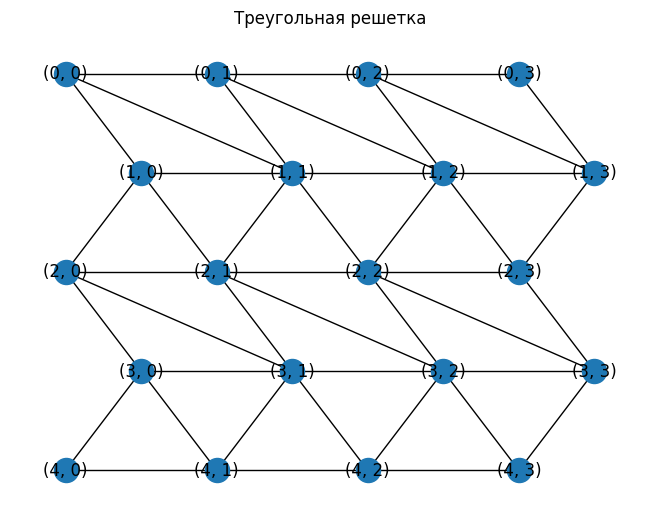

In [ ]:
#2.5-2.8
def create_triangular_grid_graph(n, m):
    G = nx.Graph()
    pos = {}

    for i in range(n):
        for j in range(m):
            G.add_node((i, j))
            pos[(i, j)] = (j + (i % 2) * 0.5, -i * np.sqrt(3) / 2)  # Позиции для треугольной решетки
            if i > 0:
                G.add_edge((i, j), (i - 1, j))           # Связываем с верхним узлом
                if j > 0:
                    G.add_edge((i, j), (i - 1, j - 1))   # Связываем с верхним левым узлом
            if j > 0:
                G.add_edge((i, j), (i, j - 1))           # Связываем с левым узлом

    return G, pos

# Пример использования треугольной решетки
triangular_grid, triangular_positions = create_triangular_grid_graph(5, 4)

# Визуализация графа
nx.draw(triangular_grid, triangular_positions, with_labels=True)
plt.title("Треугольная решетка")
plt.show()


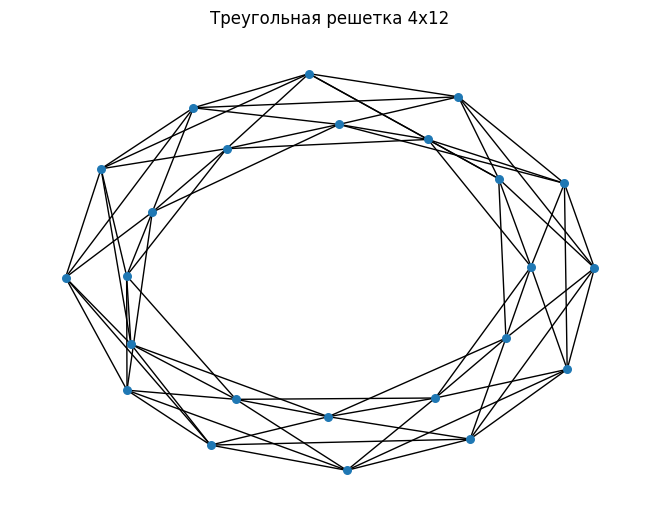

In [148]:
n, m = 4,12
# n, m = [random.randint(3, 7) for _ in range(2)]
grid = nx.triangular_lattice_graph(n, m, periodic=True, with_positions=True)

nx.draw(grid, node_size=30)
plt.title(f"Треугольная решетка {n}x{m}")
plt.show()

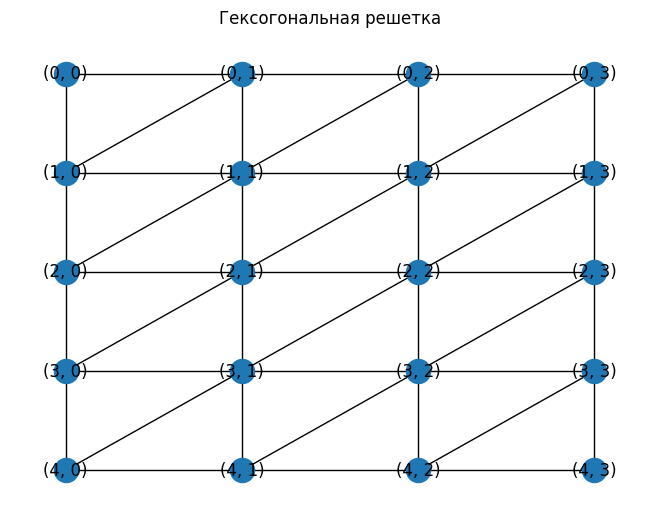

In [ ]:
#2.9-2.12
def create_hexagonal_grid_graph(n, m):
    G = nx.Graph()
    pos = {}

    for i in range(n):
        for j in range(m):
            G.add_node((i, j))
            pos[(i, j)] = (j * np.sqrt(3), -i)  # Позиции для гексогональной решетки
            if i > 0:
                G.add_edge((i, j), (i - 1, j))           # Связываем с верхним узлом
                if j < m - 1:
                    G.add_edge((i, j), (i - 1, j + 1))   # Связываем с верхним правым узлом
            if j > 0:
                G.add_edge((i, j), (i, j - 1))           # Связываем с левым узлом
                if i < n - 1:
                    G.add_edge((i, j), (i + 1, j - 1))   # Связываем с нижним левым узлом

    return G, pos

# Пример использования гексогональной решетки
hexagonal_grid, hexagonal_positions = create_hexagonal_grid_graph(5, 4)

# Визуализация графа
nx.draw(hexagonal_grid, hexagonal_positions, with_labels=True)
plt.title("Гексогональная решетка")
plt.show()


##Задание 3

3. Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис).
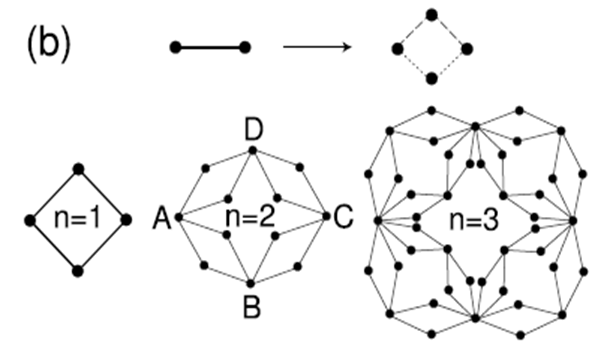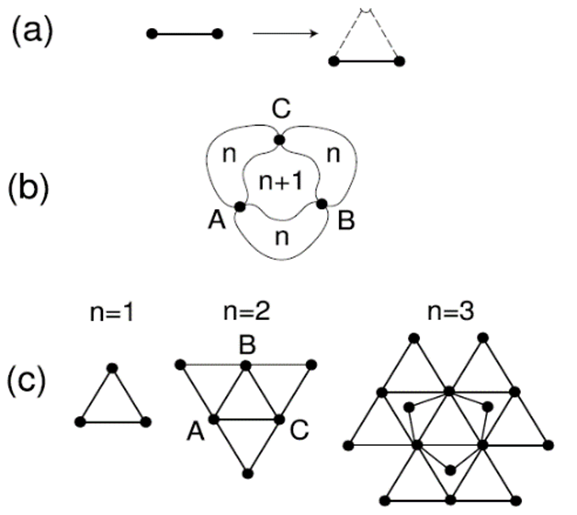

3.1. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения.

Для построенного граафа 1.2 цветка получить:

3.2. Количество узлов, количество связей, среднюю степень узла.

3.3. Визуализацию графа (с указанием идентификаторов узлов).

3.4. Степень каждого узла и сохранить информацию о ней в самом узле.

3.5. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

###Цветок 1.2

In [ ]:
#3.1
def construct_12_flower(n):
    G = nx.Graph()
    if n == 0:
        G.add_edge(0, 1)
        return G
    G.add_edge('A', 'B')
    for step in range(1, n+1):
        edges = list(G.edges())
        for u, v in edges:
            G.remove_edge(u, v)
            new_node = f"{u}_{v}_{step}"
            G.add_node(new_node)
            G.add_edge(u, new_node)
            G.add_edge(new_node, v)
            G.add_edge(u, v)
    return G

In [ ]:
#3.2
def calculate_properties(G):
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    avg_degree = (2 * edges) / nodes
    return nodes, edges, avg_degree

G = construct_12_flower(2)
nodes, edges, avg_degree = calculate_properties(G)
print(f"Узлы: {nodes}, Ребра: {edges}, Средняя степень: {avg_degree:.2f}")

Узлы: 6, Ребра: 9, Средняя степень: 3.00


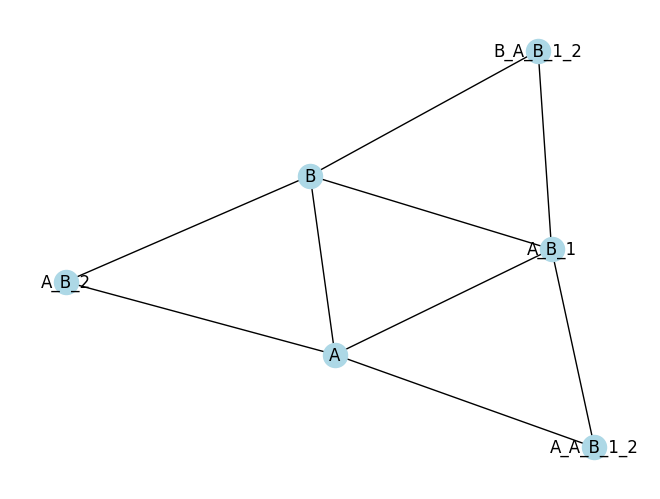

In [ ]:
#3.3
def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    plt.show()

visualize_graph(G)

In [ ]:
#3.4
def store_degrees(G):
    for node in G.nodes:
        G.nodes[node]['degree'] = G.degree[node]

store_degrees(G)

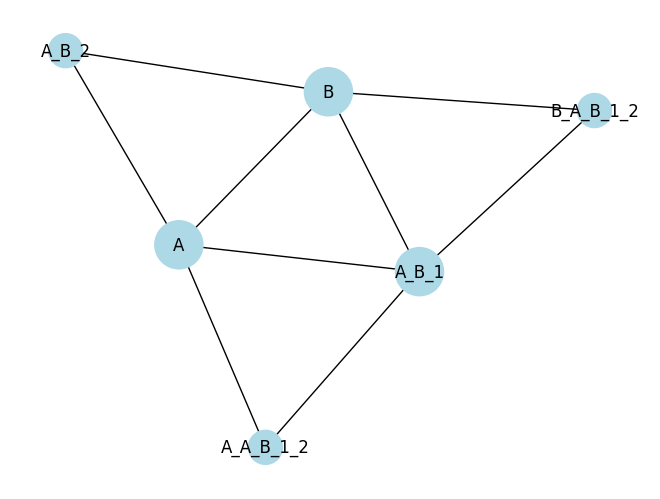

In [ ]:
#3.5
def visualize_degree_sized_graph(G):
    pos = nx.spring_layout(G)
    degrees = [G.degree[node] * 300 for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_size=degrees, node_color='lightblue')
    plt.show()

visualize_degree_sized_graph(G)

###Цветок 2.2

In [ ]:
def construct_22_flower(n):
    G = nx.Graph()
    if n == 0:
        G.add_edge(0, 1)  # Базовый случай: два узла и одно ребро
        return G

    # Инициализация для n >= 1
    G.add_edge("A", "B")

    for step in range(1, n + 1):
        edges = list(G.edges())
        for u, v in edges:
            G.remove_edge(u, v)  # Удаляем исходное ребро

            # Добавляем два новых узла и два пути длиной 2
            new_node1 = f"{u}-{v}-{step}-1"
            new_node2 = f"{u}-{v}-{step}-2"

            G.add_edge(u, new_node1)
            G.add_edge(new_node1, v)
            G.add_edge(u, new_node2)
            G.add_edge(new_node2, v)

    return G

In [ ]:
def calculate_properties(G):
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    avg_degree = (2 * edges) / nodes if nodes != 0 else 0
    return nodes, edges, avg_degree

G = construct_22_flower(3)
nodes, edges, avg_degree = calculate_properties(G)
print(f"Узлы: {nodes}, Ребра: {edges}, Средняя степень: {avg_degree:.2f}")

Узлы: 44, Ребра: 64, Средняя степень: 2.91


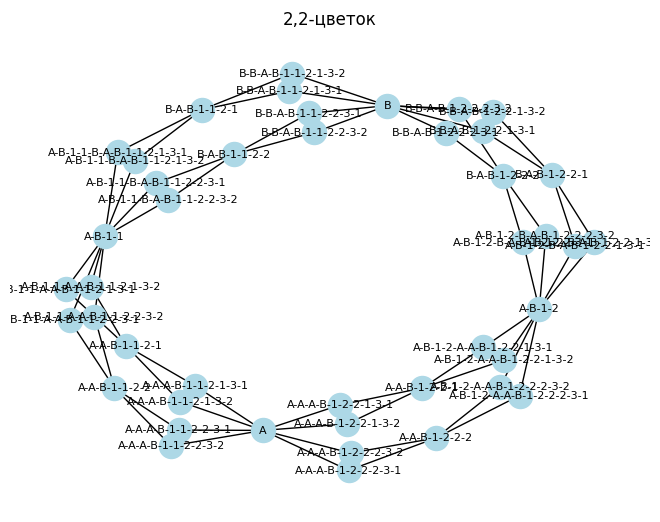

In [ ]:
def visualize_graph(G):
    pos = nx.spring_layout(G, seed=42)  # Фиксируем seed для стабильности визуализации
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8)
    plt.title("2,2-цветок")
    plt.show()

visualize_graph(G)

In [ ]:
def store_degrees(G):
    for node in G.nodes:
        G.nodes[node]["degree"] = G.degree[node]

store_degrees(G)

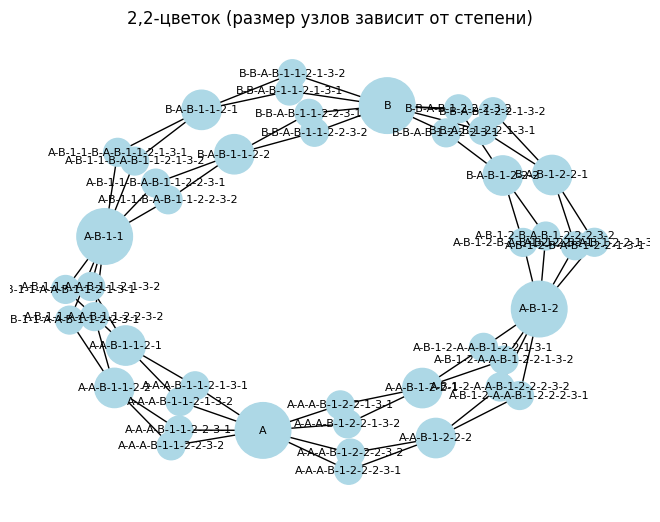

In [ ]:
def visualize_degree_sized_graph(G):
    pos = nx.spring_layout(G, seed=42)
    degrees = [G.degree[node] * 200 for node in G.nodes]  # Масштабируем размер узлов
    nx.draw(G, pos, with_labels=True, node_size=degrees, node_color="lightblue", font_size=8)
    plt.title("2,2-цветок (размер узлов зависит от степени)")
    plt.show()

visualize_degree_sized_graph(G)

##Задание 4

Для построенного граафа 1.2 цветка получить:

4.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4.3 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4.4 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4.5 Среднее значение коэффицента кластеризации для всего графа. (? разные)

In [ ]:
#4.1
def calculate_and_store_clustering(G):
    clustering = nx.clustering(G)  # Словарь: {узел: коэффициент}
    nx.set_node_attributes(G, clustering, 'clustering')

G = construct_12_flower(2)
calculate_and_store_clustering(G)

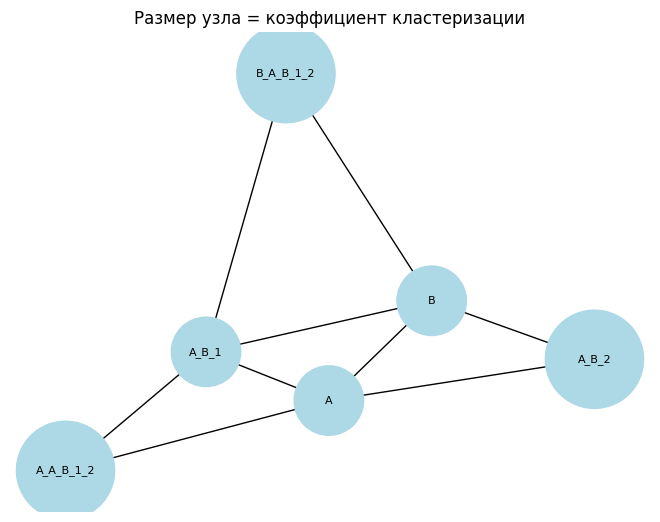

In [ ]:
#4.2
def visualize_clustering_size(G):
    pos = nx.spring_layout(G, seed=42)
    clustering_coeffs = list(nx.get_node_attributes(G, 'clustering').values())
    node_sizes = [5000 * coeff for coeff in clustering_coeffs]  # Масштабирование

    nx.draw(
        G, pos,
        with_labels=True,
        node_size=node_sizes,
        node_color="lightblue",
        font_size=8
    )
    plt.title("Размер узла = коэффициент кластеризации")
    plt.show()

visualize_clustering_size(G)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

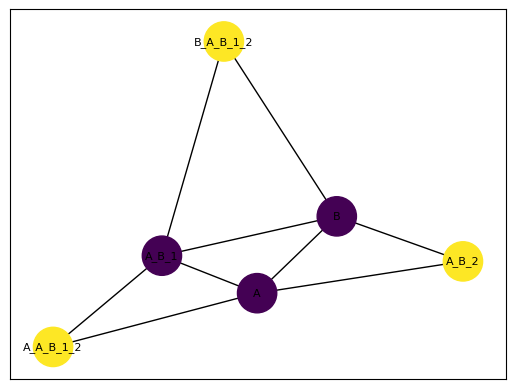

In [ ]:
#4.3
def visualize_clustering_color(G):
    pos = nx.spring_layout(G, seed=42)
    clustering_coeffs = list(nx.get_node_attributes(G, 'clustering').values())

    # Рисуем граф
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_color=clustering_coeffs,
        cmap=plt.cm.viridis,  # Цветовая карта
        node_size=800
    )
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=8)

    # Добавляем цветовую шкалу
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(clustering_coeffs), vmax=max(clustering_coeffs)))
    sm.set_array([])
    plt.colorbar(sm, label="Коэффициент кластеризации")

    plt.title("Цвет узла = коэффициент кластеризации")
    plt.show()

visualize_clustering_color(G)

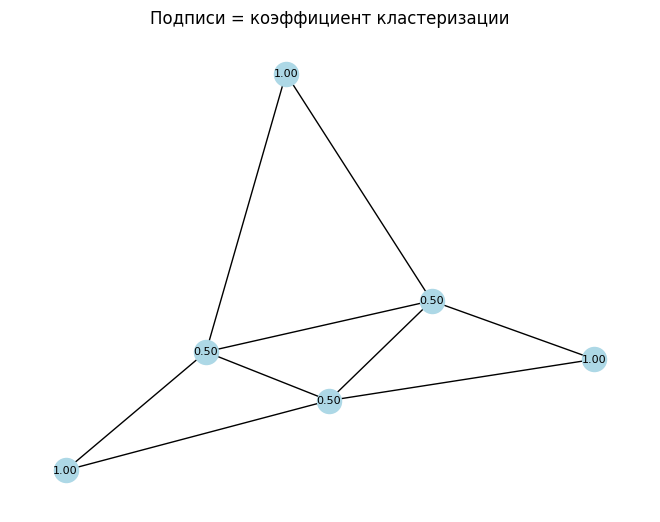

In [ ]:
#4.4
def visualize_clustering_labels(G):
    pos = nx.spring_layout(G, seed=42)
    labels = {node: f"{G.nodes[node]['clustering']:.2f}" for node in G.nodes}

    nx.draw(
        G, pos,
        labels=labels,
        node_color="lightblue",
        font_size=8
    )
    plt.title("Подписи = коэффициент кластеризации")
    plt.show()

visualize_clustering_labels(G)

In [ ]:
#4.5
def calculate_average_clustering(G):
    return nx.average_clustering(G)

avg_clustering = calculate_average_clustering(G)
print(f"Средний коэффициент кластеризации: {avg_clustering:.4f}")

Средний коэффициент кластеризации: 0.7500


##Задание 5

Для построенного граафа 1.2 цветка получить:

5.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество_узлов_с_данной_степенью), картежи в списке отсортированы по возрастанию степени.

5.2 График распределения степеней узлов.4

5.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

In [ ]:
#5.1
def get_degree_distribution(G):
    degrees = [G.degree[node] for node in G.nodes]
    degree_count = Counter(degrees)
    sorted_degree_distribution = sorted(degree_count.items(), key=lambda x: x[0])
    return sorted_degree_distribution

G = construct_12_flower(3)  # Построим граф 1,2-цветка для n=3
degree_distribution = get_degree_distribution(G)
print("Распределение степеней:", degree_distribution)

Распределение степеней: [(2, 9), (4, 3), (8, 3)]


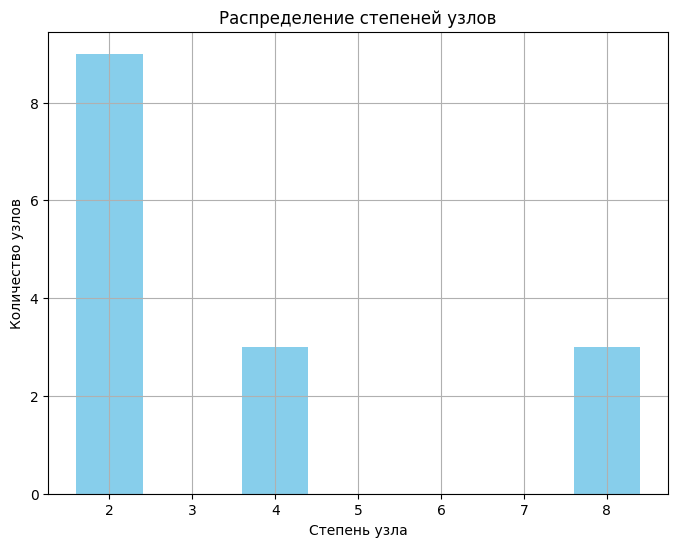

In [ ]:
#5.2
def plot_degree_distribution(G):
    degree_distribution = get_degree_distribution(G)
    degrees, counts = zip(*degree_distribution)

    plt.figure(figsize=(8, 6))
    plt.bar(degrees, counts, color="skyblue")
    plt.xlabel("Степень узла")
    plt.ylabel("Количество узлов")
    plt.title("Распределение степеней узлов")
    plt.grid(True)
    plt.show()

plot_degree_distribution(G)

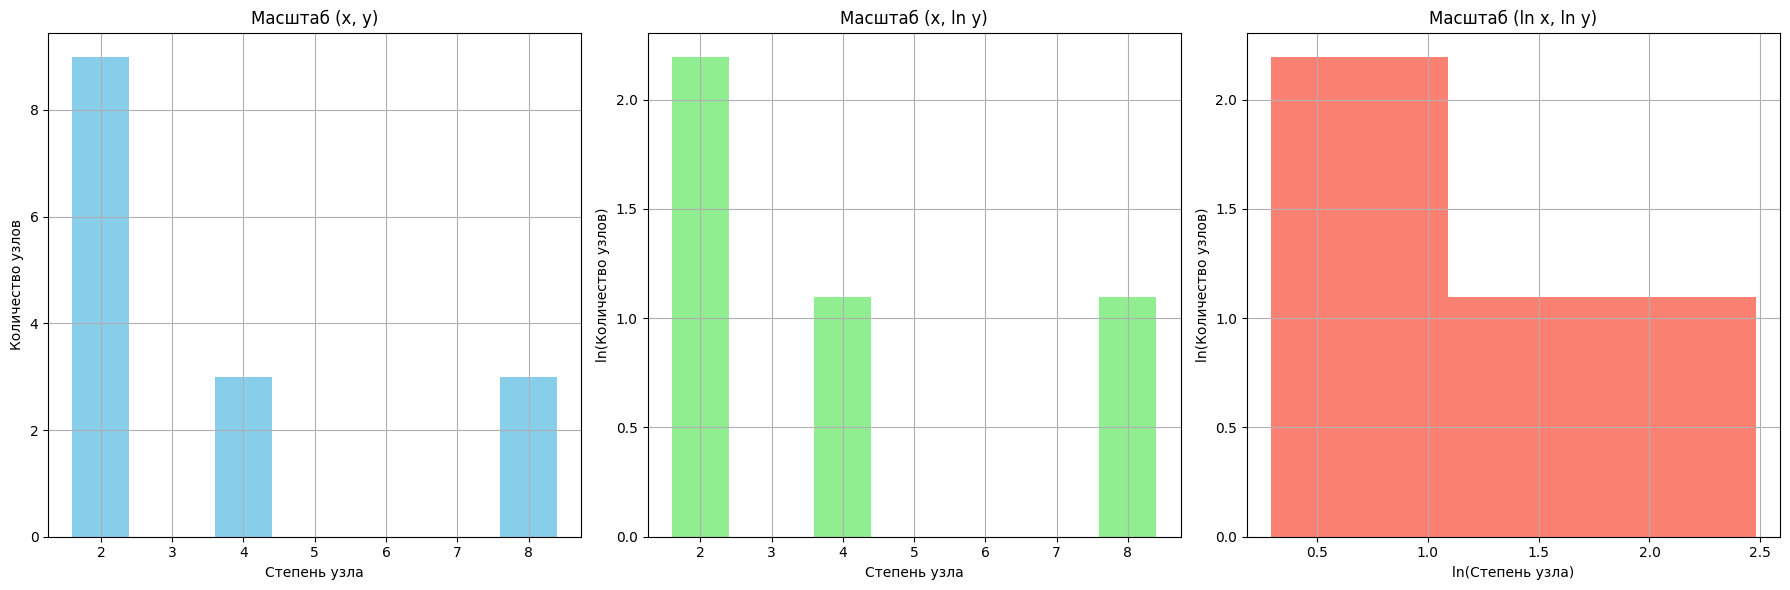

In [ ]:
#5.3
def plot_degree_distribution_scales(G):
    degree_distribution = get_degree_distribution(G)
    degrees, counts = zip(*degree_distribution)

    # Масштаб (x, y)
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.bar(degrees, counts, color="skyblue")
    plt.xlabel("Степень узла")
    plt.ylabel("Количество узлов")
    plt.title("Масштаб (x, y)")
    plt.grid(True)

    # Масштаб (x, ln y)
    plt.subplot(1, 3, 2)
    plt.bar(degrees, np.log(counts), color="lightgreen")
    plt.xlabel("Степень узла")
    plt.ylabel("ln(Количество узлов)")
    plt.title("Масштаб (x, ln y)")
    plt.grid(True)

    # Масштаб (ln x, ln y)
    plt.subplot(1, 3, 3)
    plt.bar(np.log(degrees), np.log(counts), color="salmon")
    plt.xlabel("ln(Степень узла)")
    plt.ylabel("ln(Количество узлов)")
    plt.title("Масштаб (ln x, ln y)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_degree_distribution_scales(G)

##Задание 6

Для построенного граафа 1.2 цветка получить:

6.1. Два произвольных узла и кратчайший путь между ними.

6.2. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

6.3. Средний кратчайший путь для всего графа.

6.4. Диаметр графа.

In [ ]:
#6.1
def get_shortest_path(G):
    nodes = list(G.nodes)
    start = random.choice(nodes)
    end = random.choice(nodes)

    # Убедимся, что start и end разные
    while start == end:
        end = random.choice(nodes)

    shortest_path = nx.shortest_path(G, source=start, target=end)
    return start, end, shortest_path

G = construct_12_flower(3)  # Построим граф 1,2-цветка для n=3
start, end, shortest_path = get_shortest_path(G)
print(f"Кратчайший путь от {start} до {end}: {shortest_path}")

Кратчайший путь от A_A_A_B_1_2_3 до A_A_B_1_3: ['A_A_A_B_1_2_3', 'A', 'A_A_B_1_3']


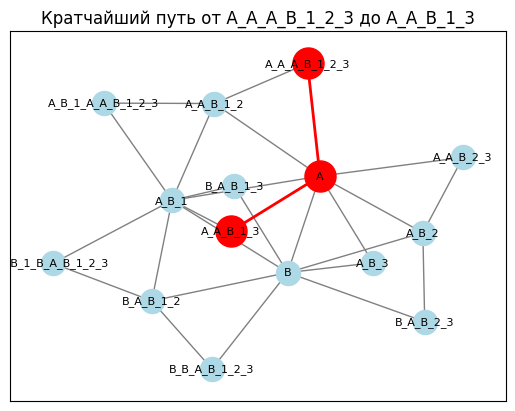

In [ ]:
#6.2
def visualize_shortest_path(G, start, end, shortest_path):
    pos = nx.spring_layout(G, seed=42)

    # Рисуем все узлы и ребра
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=300)
    nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.0)

    # Рисуем узлы и ребра кратчайшего пути
    path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="red", node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.0)

    # Подписи узлов
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(f"Кратчайший путь от {start} до {end}")
    plt.show()

visualize_shortest_path(G, start, end, shortest_path)

In [ ]:
#6.3
def calculate_average_shortest_path(G):
    if not nx.is_connected(G):
        return "Граф не связный, средний кратчайший путь не определен."
    return nx.average_shortest_path_length(G)

avg_path_length = calculate_average_shortest_path(G)
print(f"Средний кратчайший путь: {avg_path_length:.2f}")

Средний кратчайший путь: 1.94


In [ ]:
#6.4
def calculate_diameter(G):
    if not nx.is_connected(G):
        return "Граф не связный, диаметр не определен."
    return nx.diameter(G)


diameter = calculate_diameter(G)
print(f"Диаметр графа: {diameter}")

Диаметр графа: 3


##Задание 7

Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения.

In [ ]:
def construct_uv_flower(u, v, n):
    """
    Строит u,v-цветок — фрактальный граф, где каждое ребро заменяется на два пути длиной u и v.

    Параметры:
    u (int): длина первого пути (≥ 1)
    v (int): длина второго пути (≥ 1)
    n (int): количество итераций построения (≥ 0)

    Возвращает:
    networkx.Graph: граф u,v-цветка
    """
    # Проверка входных параметров
    if u < 1 or v < 1 or n < 0:
        raise ValueError("u и v должны быть ≥ 1, n ≥ 0")

    G = nx.Graph()
    if n == 0:
        # Базовый случай: два узла и одно ребро
        G.add_edge(0, 1)
        return G

    # Инициализация для n ≥ 1 (стартовый граф: два узла и одно ребро)
    G.add_edge("A", "B")

    for step in range(1, n + 1):
        edges = list(G.edges())
        for (u_old, v_old) in edges:
            G.remove_edge(u_old, v_old)

            # Добавление пути длиной u
            current_nodes = [u_old]
            for i in range(u - 1):
                new_node = f"{u_old}-{v_old}-step{step}-u-{i}"
                current_nodes.append(new_node)
            current_nodes.append(v_old)
            for i in range(len(current_nodes) - 1):
                G.add_edge(current_nodes[i], current_nodes[i+1])

            # Добавление пути длиной v
            current_nodes = [u_old]
            for i in range(v - 1):
                new_node = f"{u_old}-{v_old}-step{step}-v-{i}"
                current_nodes.append(new_node)
            current_nodes.append(v_old)
            for i in range(len(current_nodes) - 1):
                G.add_edge(current_nodes[i], current_nodes[i+1])

    return G

In [ ]:
# Построение 1,2-цветка для n=2
G_12 = construct_uv_flower(u=1, v=2, n=2)

# Построение 2,2-цветка для n=2
G_22 = construct_uv_flower(u=2, v=2, n=2)

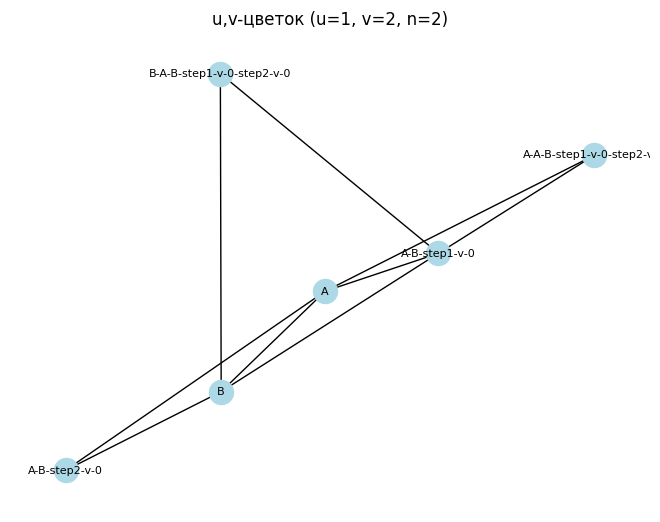

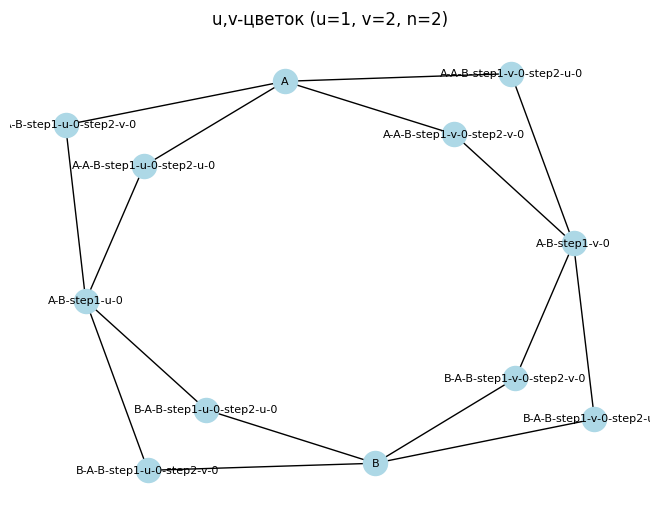

In [ ]:
def visualize_graph(G):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8)
    plt.title(f"u,v-цветок (u={u}, v={v}, n={n})")
    plt.show()

visualize_graph(G_12)
visualize_graph(G_22)